In [2]:
!pip install kneed

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from kneed import KneeLocator

In [4]:
df = pd.read_csv('/content/online_shoppers_intention.csv')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.Revenue.value_counts(dropna=False)

,count
Revenue,
False,10422
True,1908


In [7]:
# 1. Análise descritiva básica
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

In [8]:
# 2. Verificar tipos de dados
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [9]:
# 3. Verificar valores ausentes
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


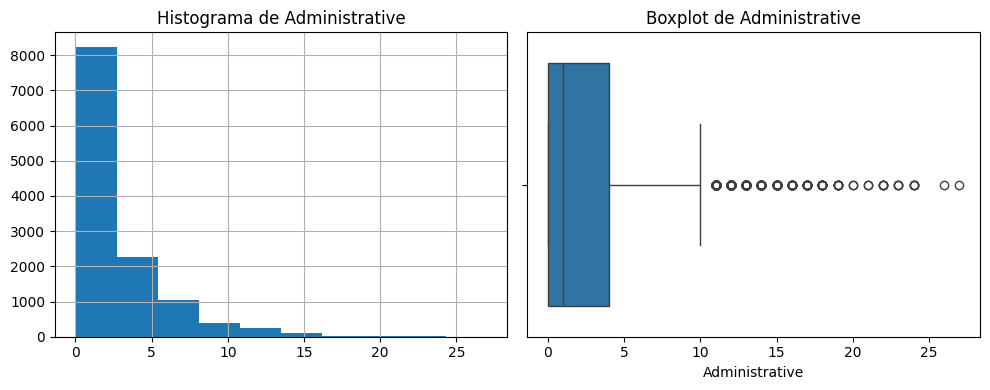

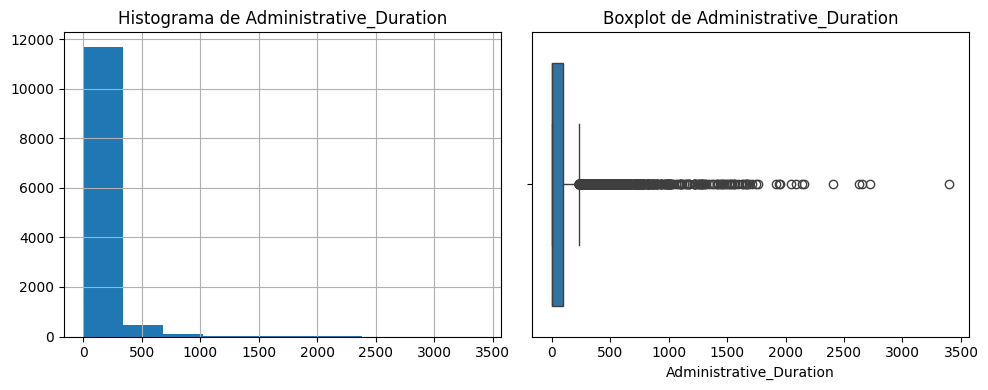

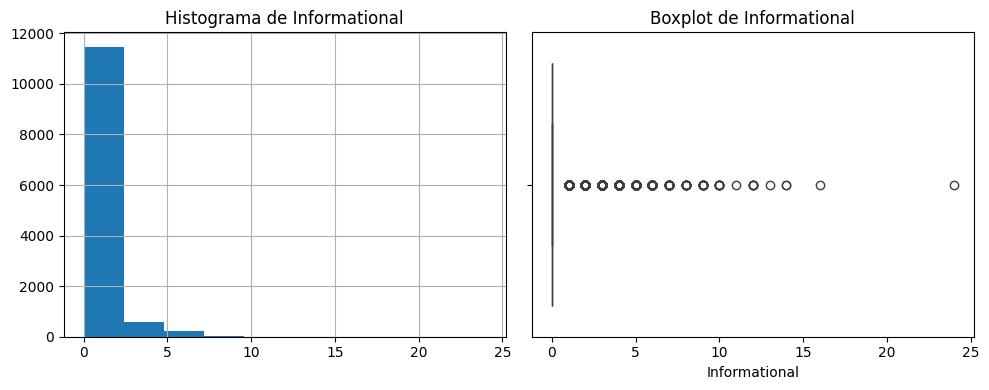

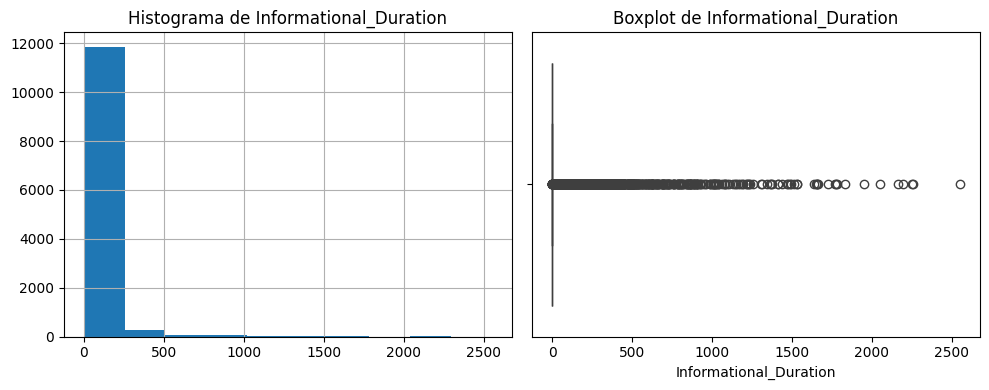

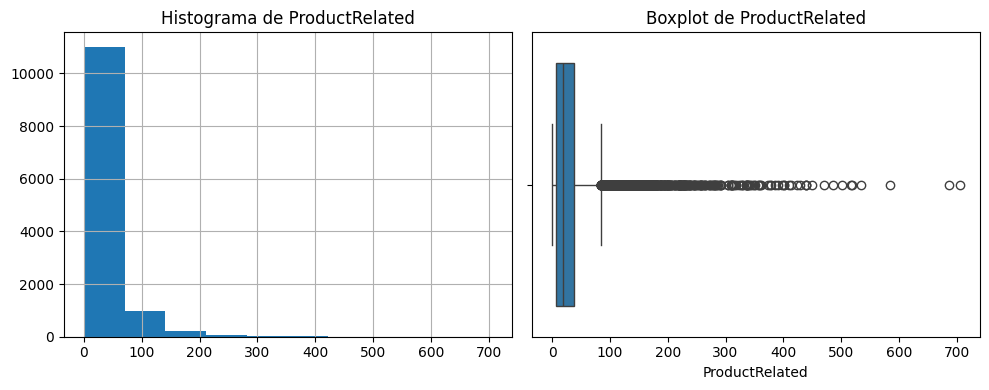

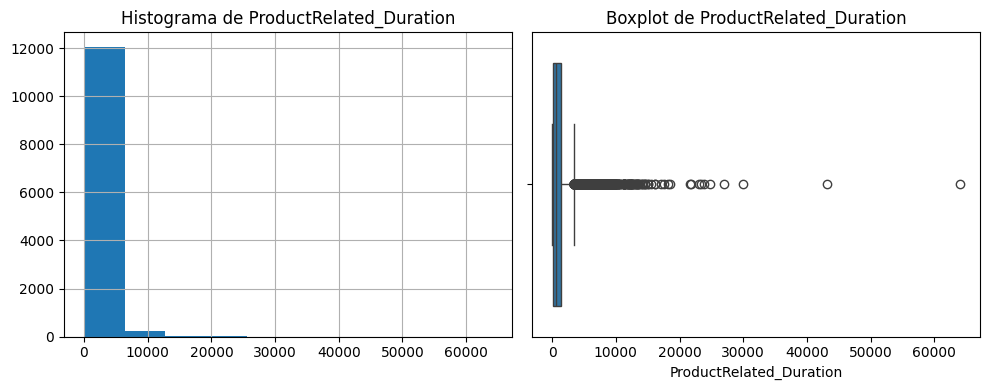

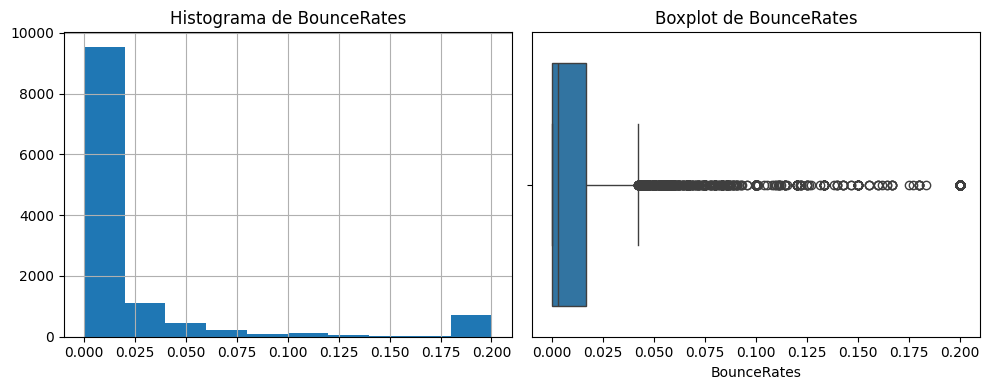

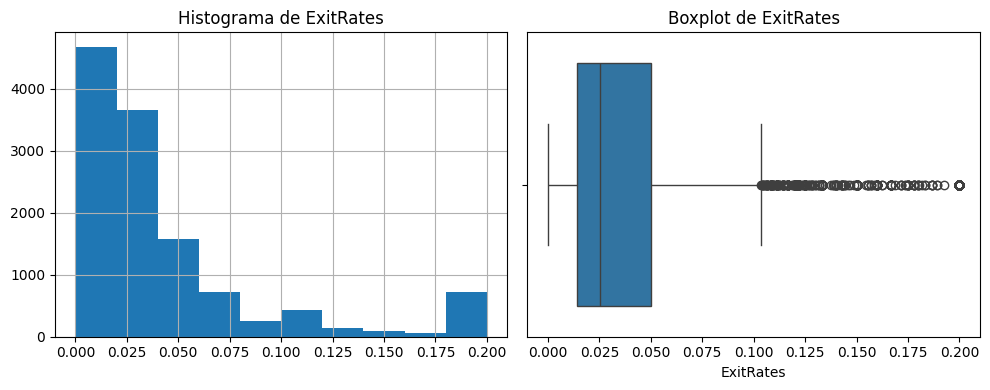

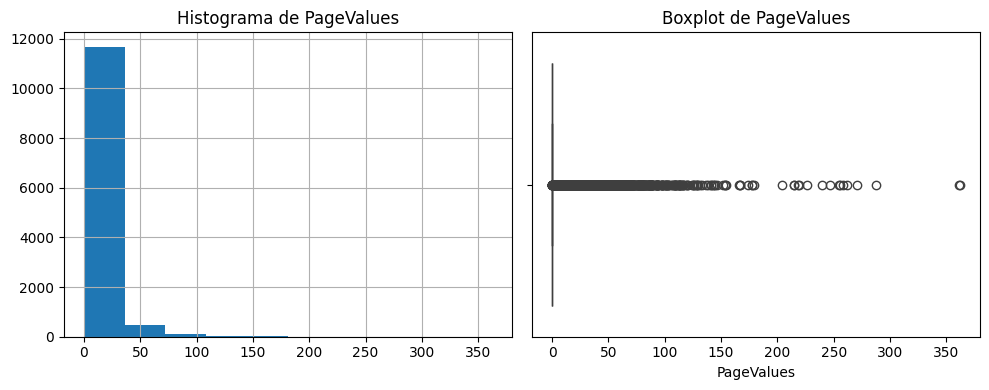

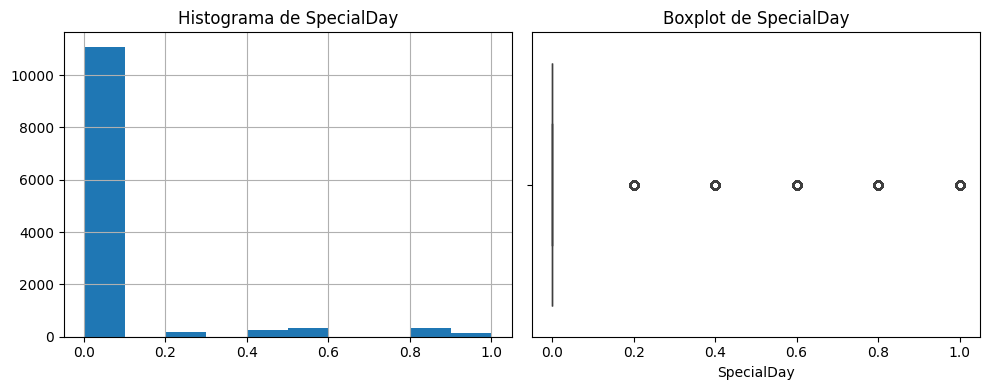

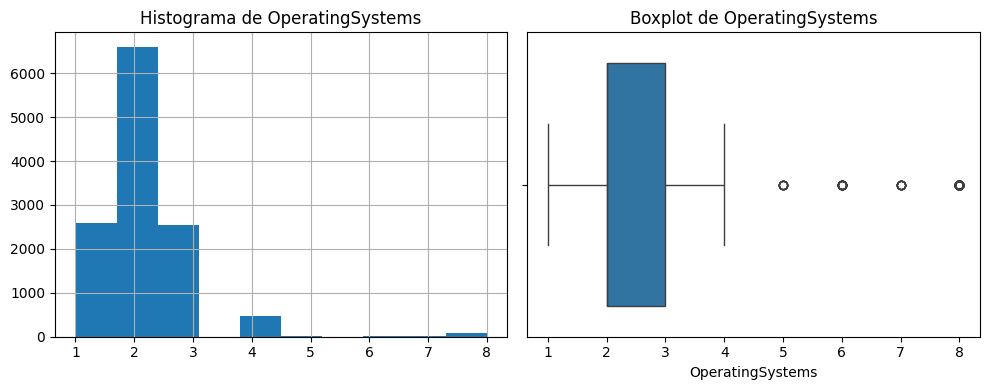

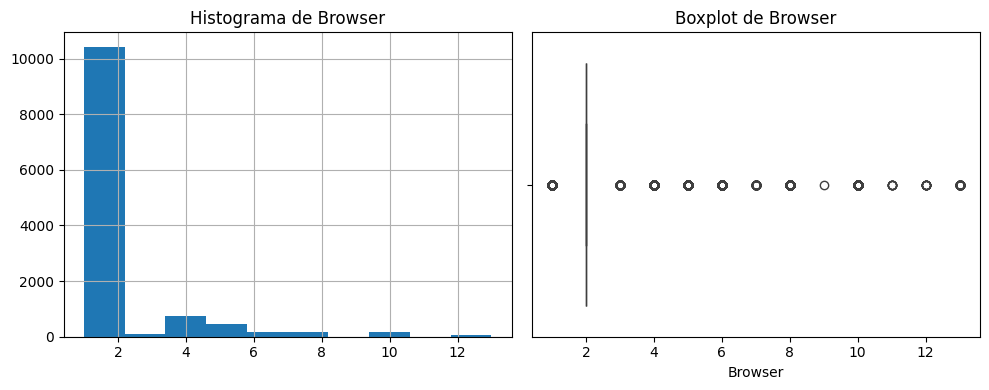

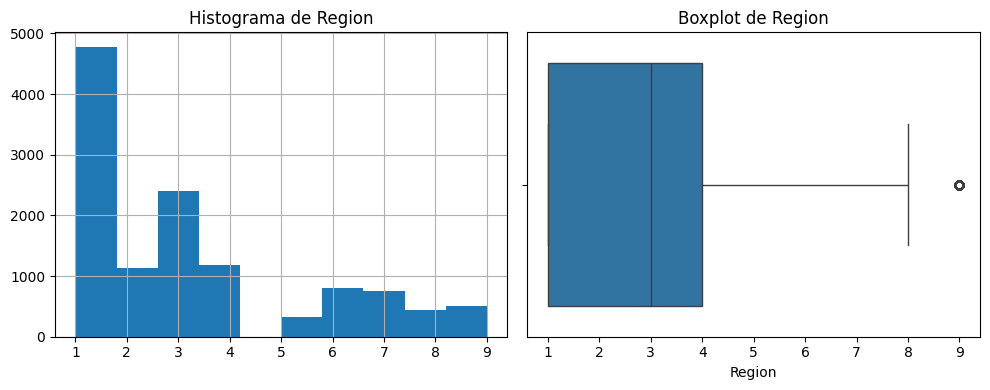

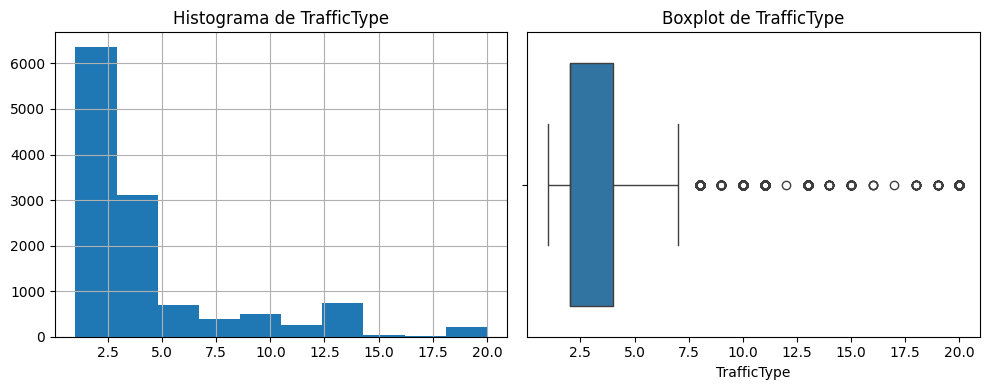

In [10]:
# 4. Distribuição das variáveis numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    df[col].hist()
    plt.title(f'Histograma de {col}')
    plt.subplot(122)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()


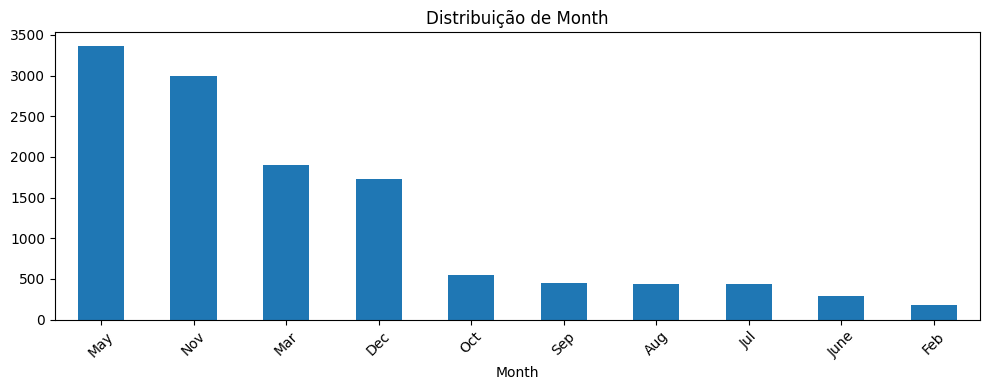

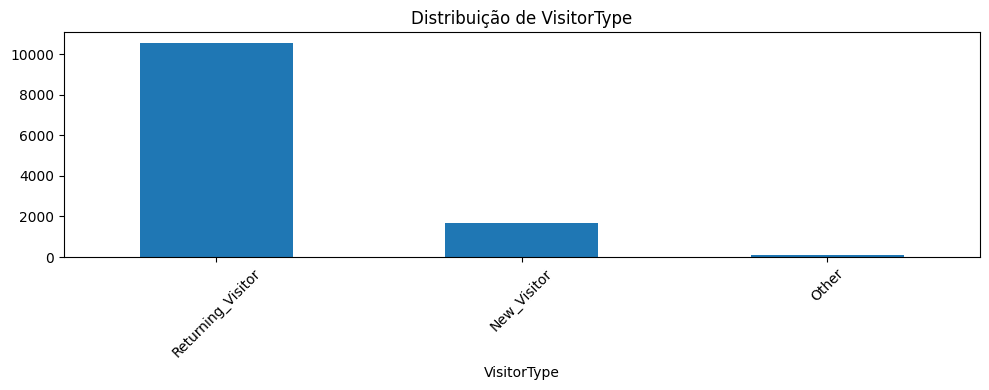

In [11]:
# 5. Distribuição das variáveis categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
# 6. Tratamento de valores ausentes
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            # Para variáveis numéricas, preencher com a mediana
            df[col].fillna(df[col].median(), inplace=True)
        else:
            # Para variáveis categóricas, preencher com o modo
            df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
# 7. Verificar outliers nas variáveis numéricas
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers em {col}: {len(outliers)}")


Outliers em Administrative: 404
Outliers em Administrative_Duration: 1172
Outliers em Informational: 2631
Outliers em Informational_Duration: 2405
Outliers em ProductRelated: 987
Outliers em ProductRelated_Duration: 961
Outliers em BounceRates: 1551
Outliers em ExitRates: 1099
Outliers em PageValues: 2730
Outliers em SpecialDay: 1251
Outliers em OperatingSystems: 111
Outliers em Browser: 4369
Outliers em Region: 511
Outliers em TrafficType: 2101


In [14]:
# 8. Normalização de variáveis numéricas (se necessário)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [15]:
# 9. Codificação de variáveis categóricas (se necessário)
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

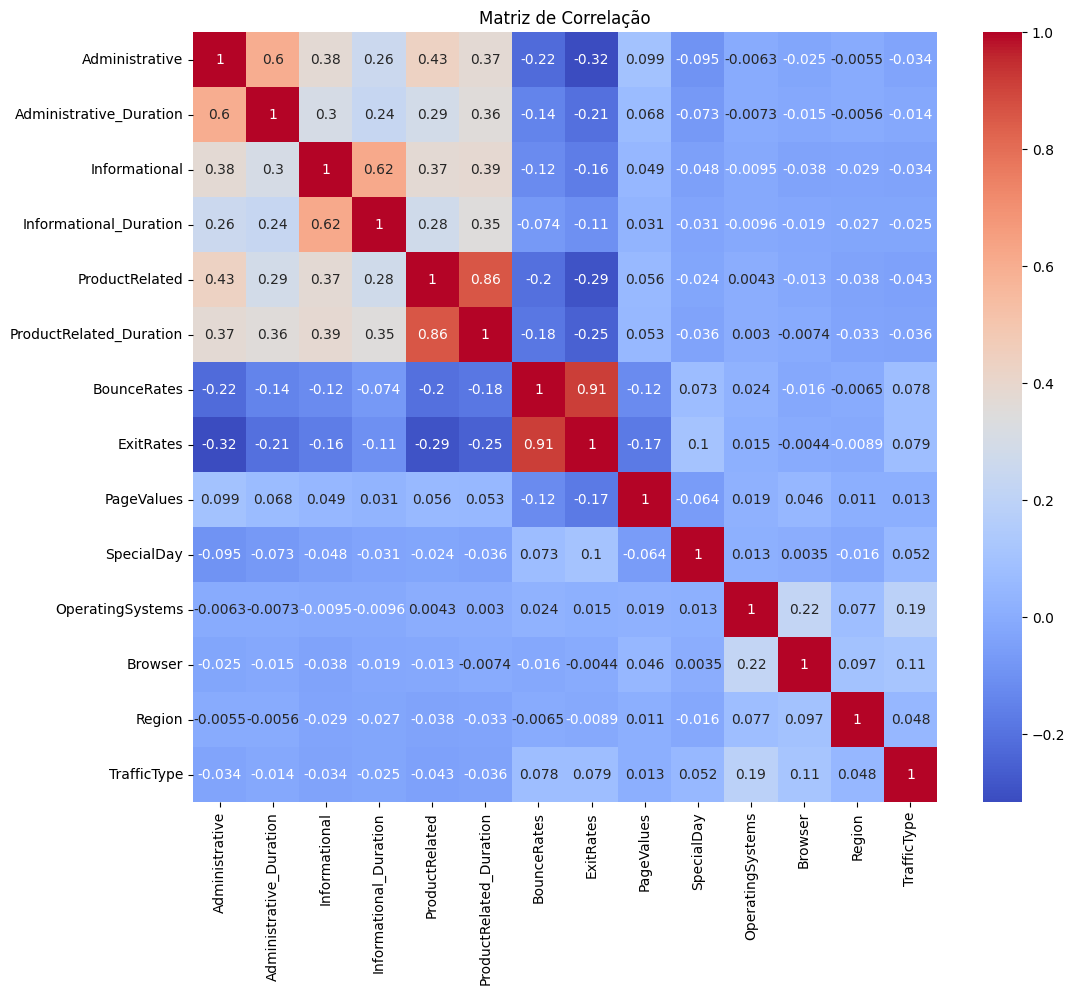

Análise e tratamento concluídos.


In [16]:
# 10. Verificar correlações entre variáveis numéricas
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

print("Análise e tratamento concluídos.")

In [17]:
# Selecione as features para clustering
features = ['Administrative', 'Administrative_Duration', 'Informational']
X = df[features]

In [18]:
# Normalize os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Função para calcular o Gap Statistic
def compute_gap_statistic(data, k_range, n_references=5):
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in k_range:
        local_inertia = []
        for _ in range(n_references):
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(reference)
            local_inertia.append(kmeans.inertia_)
        reference_inertia.append(np.mean(local_inertia))

    ondata_inertia = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        ondata_inertia.append(kmeans.inertia_)

    gap = np.log(reference_inertia) - np.log(ondata_inertia)
    return gap

In [20]:
# Definir o range de número de clusters a serem testados
k_range = range(1, 11)

In [21]:
# Método do Cotovelo
inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


In [22]:
# Método da Silhueta
silhouette_scores = []
for k in k_range[1:]:  # Começa de 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)


In [23]:
# Gap Statistic
gap_stats = compute_gap_statistic(X_scaled, k_range)

In [24]:
# Plotagem dos resultados
plt.figure(figsize=(20, 5))

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

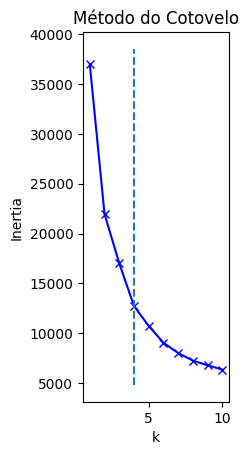

In [25]:
# Método do Cotovelo
plt.subplot(131)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo')
kn = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

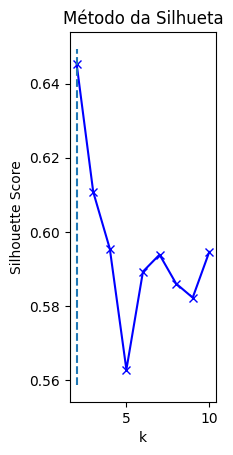

In [26]:
# Método da Silhueta
plt.subplot(132)
plt.plot(k_range[1:], silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Método da Silhueta')
plt.vlines(silhouette_scores.index(max(silhouette_scores)) + 2, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

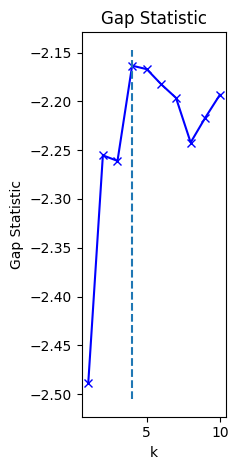

Número ótimo de clusters segundo o Método do Cotovelo: 4
Número ótimo de clusters segundo o Método da Silhueta: 2
Número ótimo de clusters segundo o Gap Statistic: 4


In [27]:
# Gap Statistic
plt.subplot(133)
plt.plot(k_range, gap_stats, 'bx-')
plt.xlabel('k')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic')
optimal_k = k_range[np.argmax(gap_stats)]
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

plt.tight_layout()
plt.show()

print(f"Número ótimo de clusters segundo o Método do Cotovelo: {kn.knee}")
print(f"Número ótimo de clusters segundo o Método da Silhueta: {silhouette_scores.index(max(silhouette_scores)) + 2}")
print(f"Número ótimo de clusters segundo o Gap Statistic: {optimal_k}")

In [28]:
# Função para realizar o clustering e adicionar os rótulos ao dataframe
def add_cluster_labels(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    df[f'Cluster_{n_clusters}'] = labels
    return df

In [29]:
# Adicionar rótulos de cluster para 3 e 4 grupos
df = add_cluster_labels(df, 3)
df = add_cluster_labels(df, 4)

In [30]:
# Função para análise descritiva dos clusters
def analyze_clusters(df, n_clusters):
    print(f"\nAnálise para {n_clusters} clusters:")

    # Estatísticas descritivas por cluster
    cluster_stats = df.groupby(f'Cluster_{n_clusters}')[features].agg(['mean', 'median', 'std'])
    print("\nEstatísticas descritivas por cluster:")
    print(cluster_stats)

    # Tamanho dos clusters
    cluster_sizes = df[f'Cluster_{n_clusters}'].value_counts().sort_index()
    print("\nTamanho dos clusters:")
    print(cluster_sizes)

    # Visualização da distribuição das features por cluster
    fig, axes = plt.subplots(len(features), 1, figsize=(12, 5*len(features)))
    for i, feature in enumerate(features):
        sns.boxplot(x=f'Cluster_{n_clusters}', y=feature, data=df, ax=axes[i])
        axes[i].set_title(f'Distribuição de {feature} por Cluster')
    plt.tight_layout()
    plt.show()

    # Gráfico de dispersão para as duas primeiras features
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(df[features[0]], df[features[1]], c=df[f'Cluster_{n_clusters}'], cmap='viridis')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f'Gráfico de Dispersão para {n_clusters} Clusters')
    plt.colorbar(scatter)
    plt.show()


Análise para 3 clusters:

Estatísticas descritivas por cluster:
          Administrative                     Administrative_Duration  \
                    mean    median       std                    mean   
Cluster_3                                                              
0              -0.431045 -0.696993  0.398569               -0.329363   
1               1.353598  1.109339  1.406298                1.062371   
2               1.436073  1.109339  0.924040                1.087280   

                              Informational                      
             median       std          mean    median       std  
Cluster_3                                                        
0         -0.457191  0.236433     -0.252424 -0.396478  0.430020  
1          0.531303  1.953886      3.135111  2.752868  1.534999  
2          0.648715  1.460237      0.004240 -0.396478  0.593284  

Tamanho dos clusters:
Cluster_3
0    9450
1     758
2    2122
Name: count, dtype: int64


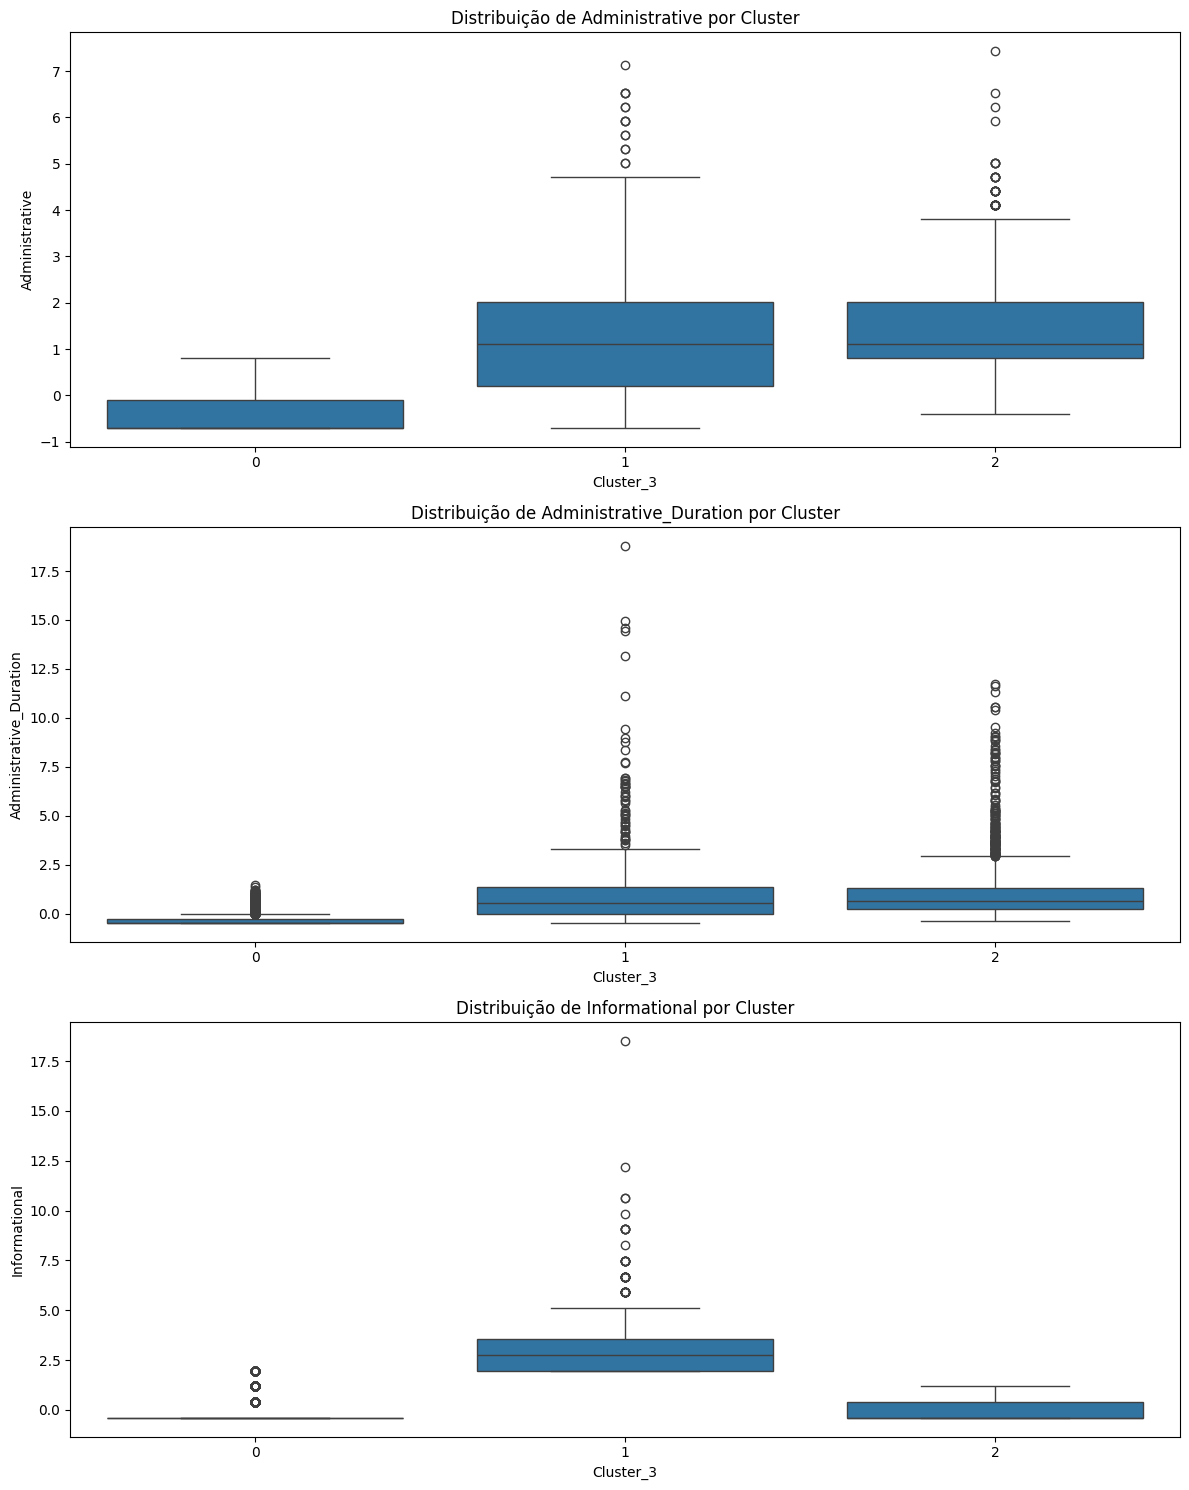

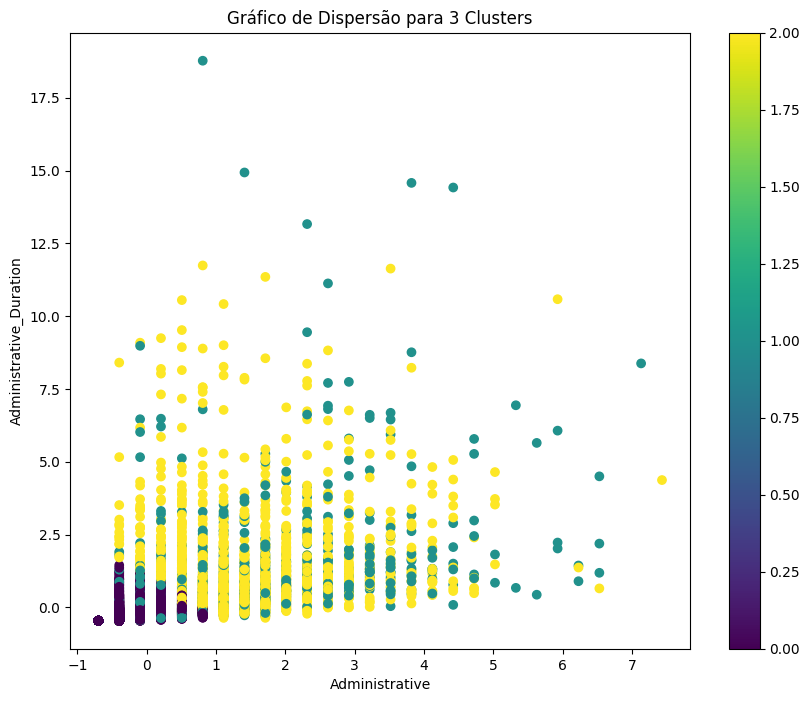


Análise para 4 clusters:

Estatísticas descritivas por cluster:
          Administrative                     Administrative_Duration  \
                    mean    median       std                    mean   
Cluster_4                                                              
0              -0.497397 -0.696993  0.317004               -0.358661   
1               2.132926  2.012504  1.540132                5.307011   
2               1.185335  1.109339  0.843269                0.596376   
3               1.126738  0.808283  1.326301                0.538657   

                              Informational                      
             median       std          mean    median       std  
Cluster_4                                                        
0         -0.457191  0.201682     -0.275363 -0.396478  0.385797  
1          4.456171  2.522736      0.938571  0.390859  2.076391  
2          0.415119  0.699172     -0.022286 -0.396478  0.580352  
3          0.361660  0.839401     

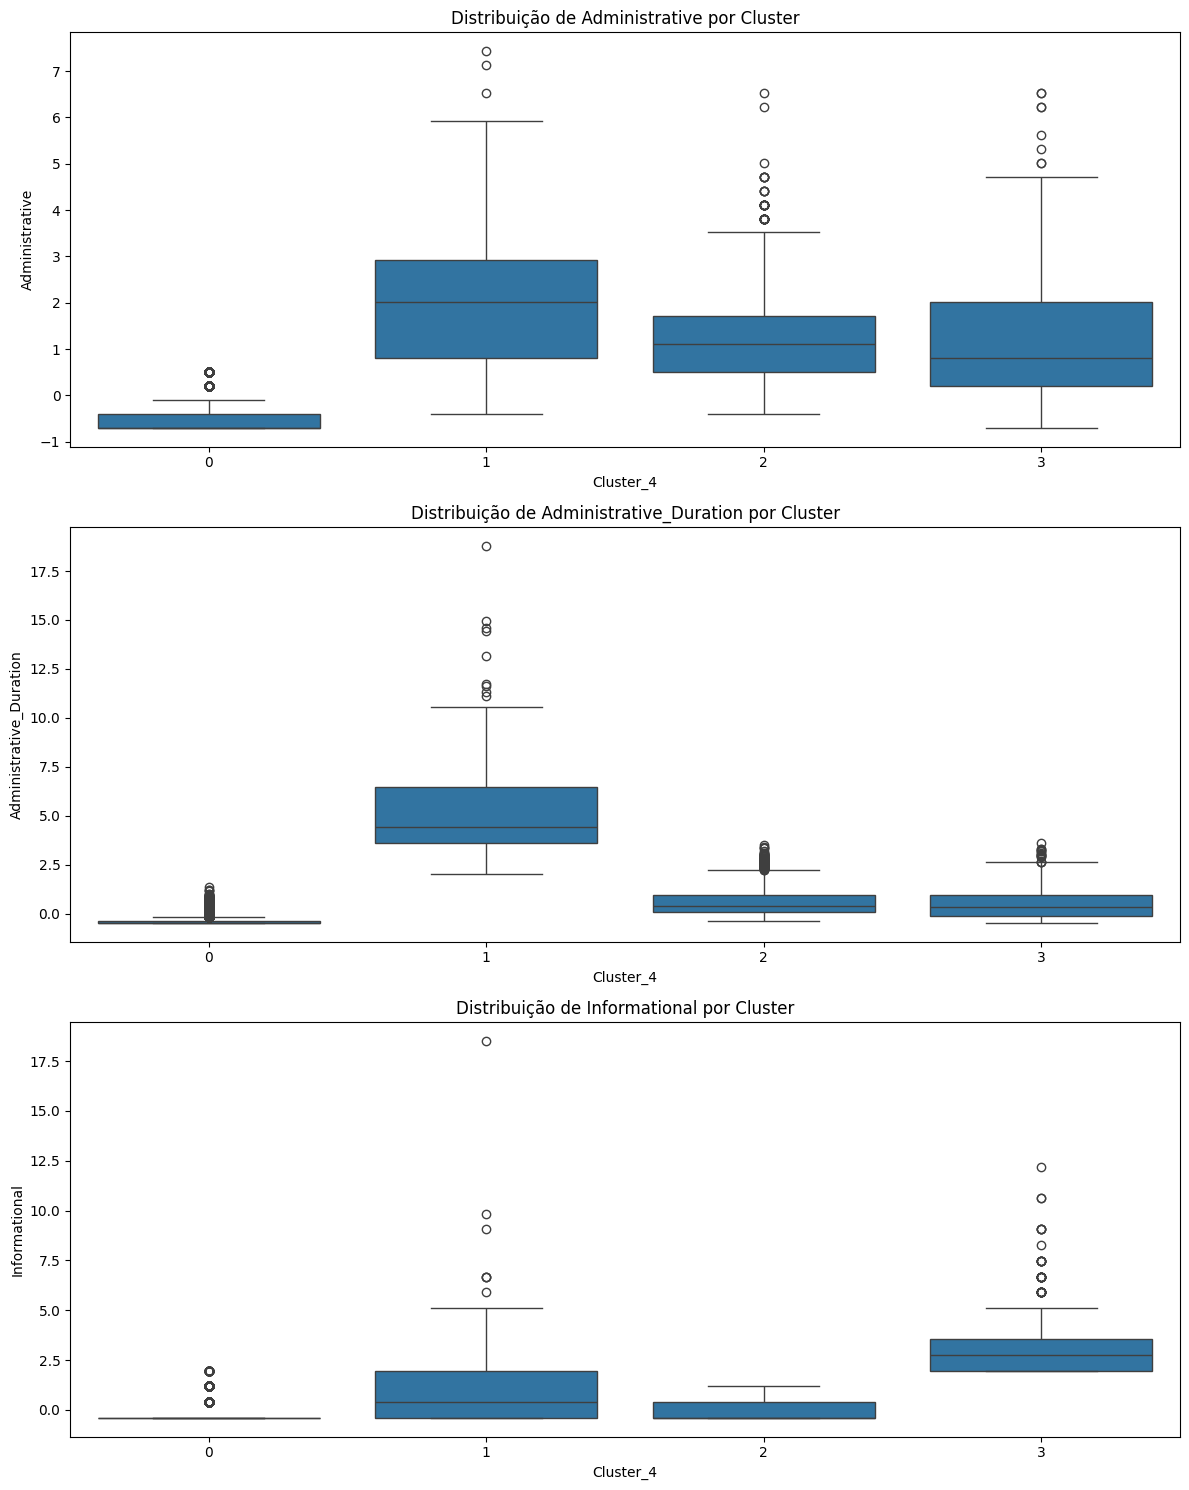

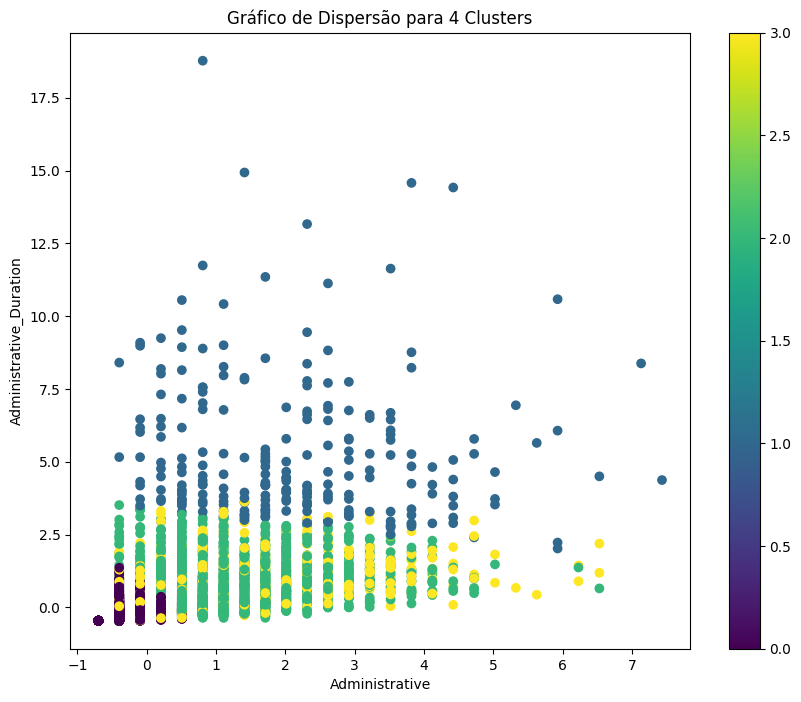

In [31]:
# Realizar análise para 3 e 4 clusters
analyze_clusters(df, 3)
analyze_clusters(df, 4)

In [32]:
# Função para sugerir nomes para os clusters
def suggest_cluster_names(df, n_clusters):
    cluster_means = df.groupby(f'Cluster_{n_clusters}')[features].mean()
    cluster_names = []
    for i in range(n_clusters):
        characteristics = []
        for feature in features:
            if cluster_means.loc[i, feature] > cluster_means[feature].mean():
                characteristics.append(f"Alto {feature}")
            else:
                characteristics.append(f"Baixo {feature}")
        cluster_names.append(f"Grupo {i+1}: " + ", ".join(characteristics))
    return cluster_names

In [33]:
# Sugerir nomes para os clusters
print("\nNomes sugeridos para 3 clusters:")
print("\n".join(suggest_cluster_names(df, 3)))

print("\nNomes sugeridos para 4 clusters:")
print("\n".join(suggest_cluster_names(df, 4)))


Nomes sugeridos para 3 clusters:
Grupo 1: Baixo Administrative, Baixo Administrative_Duration, Baixo Informational
Grupo 2: Alto Administrative, Alto Administrative_Duration, Alto Informational
Grupo 3: Alto Administrative, Alto Administrative_Duration, Baixo Informational

Nomes sugeridos para 4 clusters:
Grupo 1: Baixo Administrative, Baixo Administrative_Duration, Baixo Informational
Grupo 2: Alto Administrative, Alto Administrative_Duration, Alto Informational
Grupo 3: Alto Administrative, Baixo Administrative_Duration, Baixo Informational
Grupo 4: Alto Administrative, Baixo Administrative_Duration, Alto Informational
